In [1]:
# Importing Libraries
# For Data Manipulation
import numpy as np
import pandas as pd
import re
import string
# For NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df_1 = pd.read_csv('test.csv')

In [3]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# It can be noted that there are some comments which are not classified as any of the target variables. Hence, I'm considering them as normal comments.

In [5]:
df.shape

(159571, 8)

In [6]:
df['id'].nunique()

159571

In [7]:
print(df_1['id'].nunique())
print(df_1.shape)

153164
(153164, 2)


In [8]:
# Since we have a complete column with all unique values, we can remove it. 
df.drop(['id'], axis = 1, inplace = True)
df_1.drop(['id'], axis = 1, inplace = True)

In [9]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
df_1.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [11]:
missing_val = df.isnull().sum()
print(missing_val)

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [13]:
#Counting for the normal comments

sum_by_row = df.iloc[:,2:]
normal_comment = (sum_by_row==0).sum(axis=0)

print("Total number of comments = ", len(df))
print('\n')
print("Number of clean comments = \n ", normal_comment)
print('\n')
print("Number of comments with labels =\n ", (len(df)-normal_comment))

Total number of comments =  159571


Number of clean comments = 
  highly_malignant    157976
rude                151122
threat              159093
abuse               151694
loathe              158166
dtype: int64


Number of comments with labels =
  highly_malignant    1595
rude                8449
threat               478
abuse               7877
loathe              1405
dtype: int64


In [14]:
# Counting comments which comes under multiple categories
sum_by_row = df.iloc[:,2:].sum(axis=1)
multi_cat_comments = sum_by_row.value_counts()
multi_cat_comments

0    149012
2      4406
1      3957
3      1780
4       385
5        31
dtype: int64

Text(0.5, 0, 'Comment Type ')

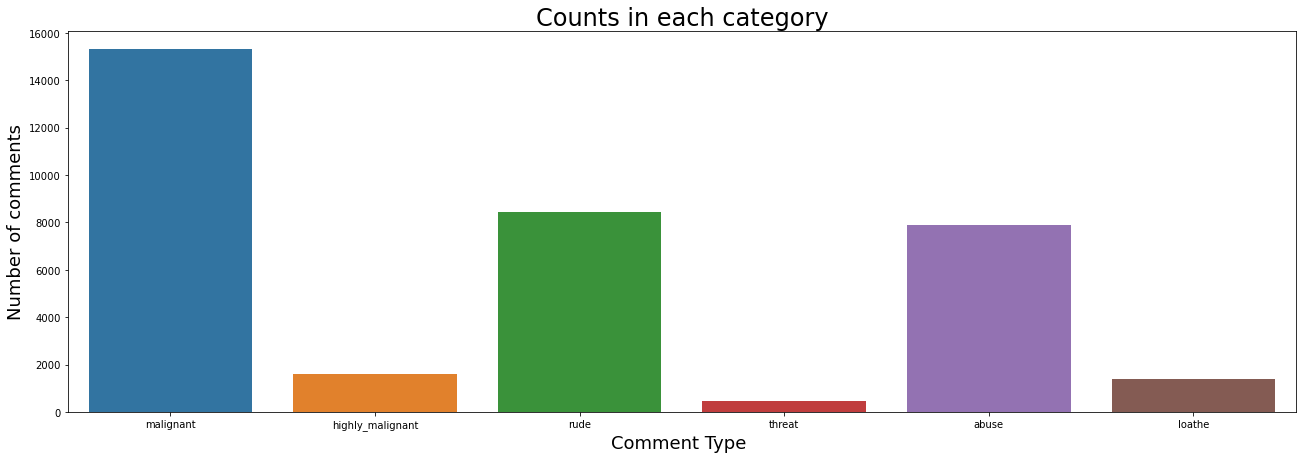

In [15]:
categ = list(df.iloc[:,1:].columns.values)
plt.figure(figsize = (22,7))
ax = sns.barplot(categ, df.iloc[:,1:].sum().values)
plt.title('Counts in each category', fontsize = 24)
plt.ylabel('Number of comments', fontsize = 18)
plt.xlabel('Comment Type ', fontsize = 18)

In [16]:
# Cleaning the comments
def clean_txt(text):
    text = text.lower()                                               # To lower cases
    text = re.sub('\[.*?\]','',text)                                  # Removing email addresses
    text = re.sub('\\W', ' ', text)                                   # Removing Punctuations
    text = re.sub('https?://\S+|www\.S+', '', text)                   # Replace URLs with 'webaddress'
    text = re.sub('<.*?>+', '', text)                                 # Removing the HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   # Removing Punctuations
    text = re.sub('\n', '', text)                                     # Removing new lines
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
df['comment_text'] = df['comment_text'].apply(clean_txt)

In [18]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [19]:
# Checking if there are digits in the comments
import inflect
inf = inflect.engine()

In [20]:
def convert_num(text):
    temp_string = text.split()                   # Split string to list of texts
    new_str = []                                 # Initializing a string
    
    for word in temp_string:
        if word.isdigit():
            temp = inf.number_to_words(word)       # If text is a digit, then convert it to text and append in the new string
            new_str.append(temp)
            
        else:                                    # Append the text as it is
            new_str.append(word)
            
    temp_str = ' '.join(new_str)                 # Join the texts of new_str to form a string
    return temp_str

In [21]:
df['comment_text'] = df['comment_text'].apply(convert_num)

In [22]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [23]:
# Stopwords
print(stopwords.words('English'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# Tokenizing, stopword removal, and lemmatization
def stopword_removal(text):
    tokenized_text = word_tokenize(text) #word_tokenization
    stop_words = set(stopwords.words('english') + ['u','ur','im','doin', 'ü', 'â', 'e', 'ur', 'doin', 'ure','READ MORE']) #declaring stop Stop_Words
    WL = WordNetLemmatizer() #declaring lemmatizer
    text = [WL.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()] # lemmatization and removal of stop_words
    return " " .join(text)

In [25]:
df['comment_text'] = df['comment_text'].apply(stopword_removal)

In [26]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


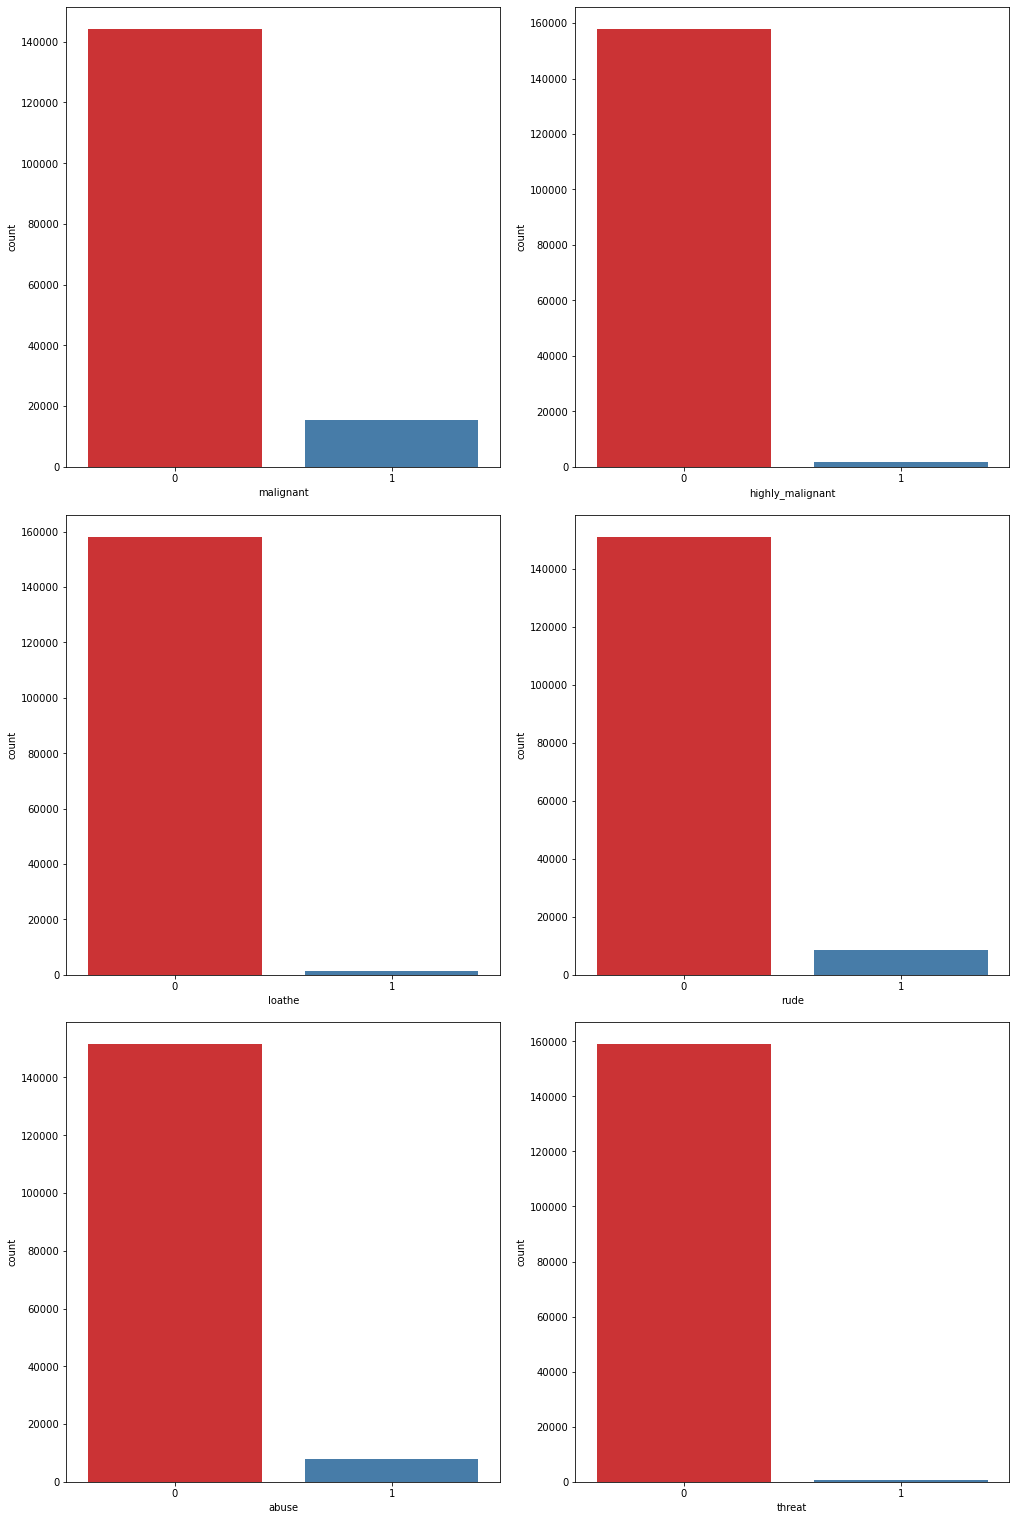

In [27]:
# Visualization if binaries
cols = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
num_plots = len(cols)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(cols):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos], palette="Set1")

In [28]:
# Plotting Wordcloud to find the most commonly used terms
def the_word(i):
    plot = df['comment_text'][df[i] == 1]
    plot_cloud = WordCloud(width = 700,height = 500,background_color = 'white',max_words = 200).generate(' '.join(plot))
    plt.figure(figsize = (10,8),facecolor = 'r')
    plt.imshow(plot_cloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

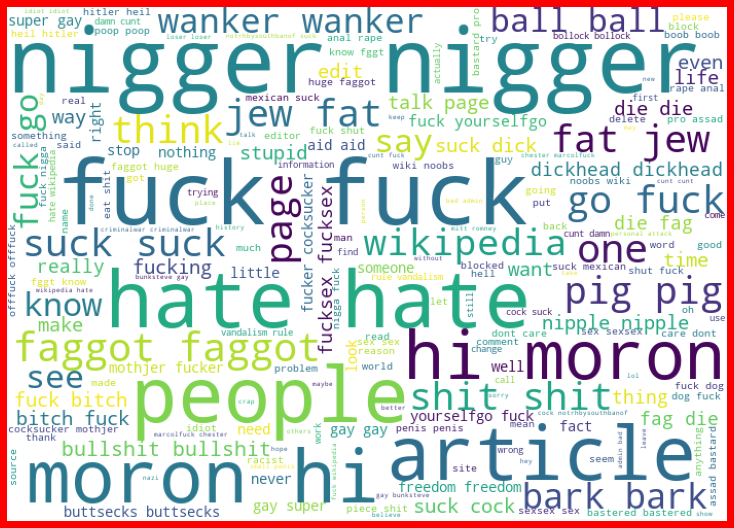

In [29]:
the_word('malignant')

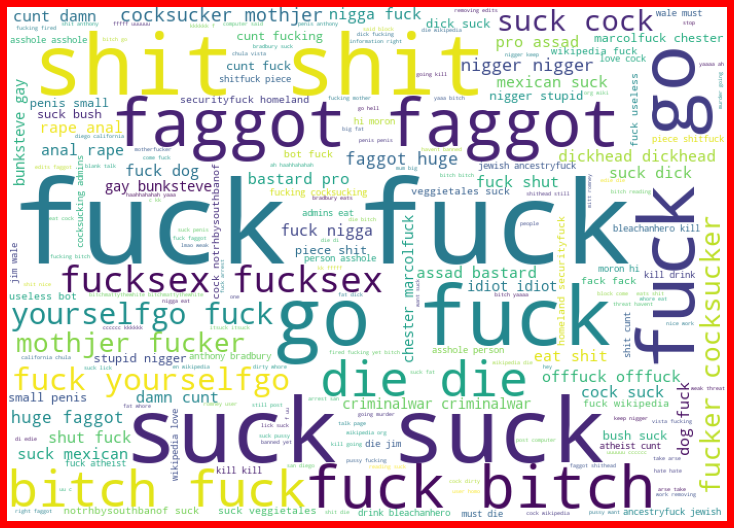

In [30]:
the_word('highly_malignant')

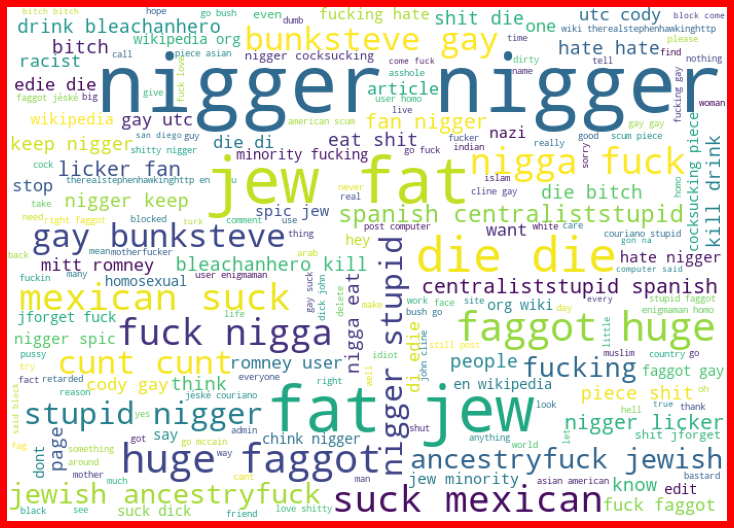

In [31]:
the_word('loathe')

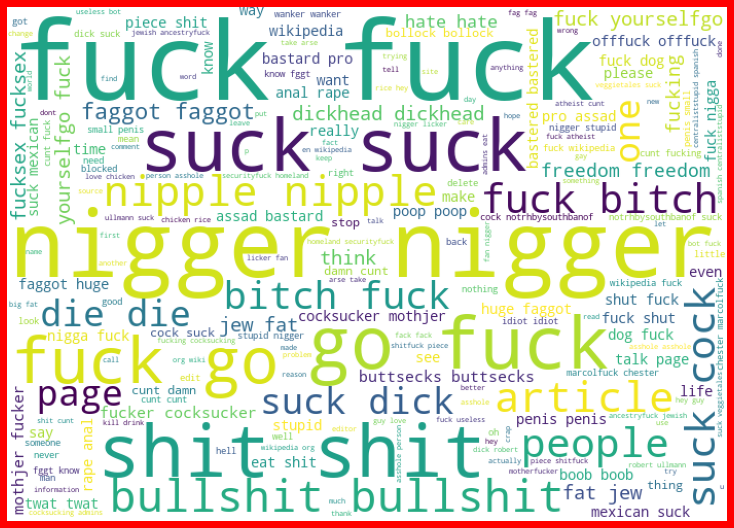

In [32]:
the_word('rude')

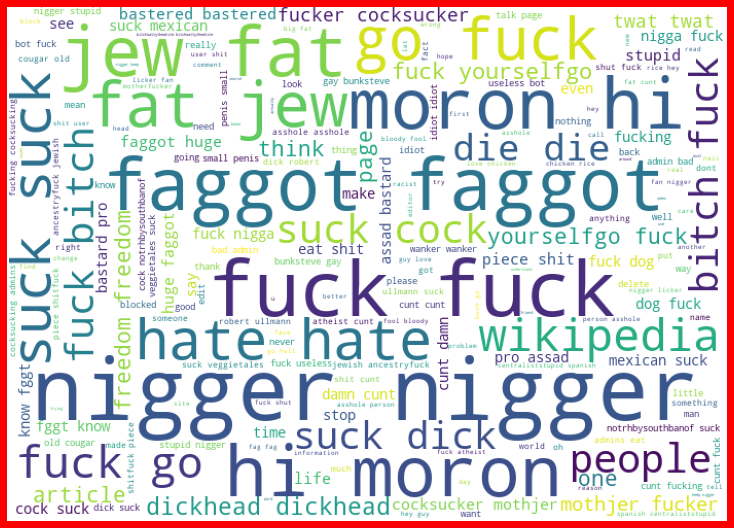

In [33]:
the_word('abuse')

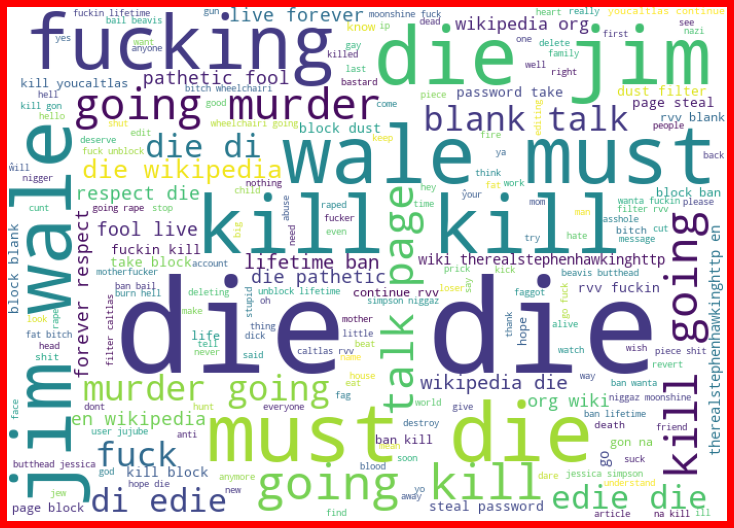

In [34]:
the_word('threat')

In [35]:
# Feature extraction
tfidf = TfidfVectorizer(max_features= 2000)
x = tfidf.fit_transform(df['comment_text'])
y = df[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 42, test_size = .30)

In [38]:
x.shape, y.shape

((159571, 2000), (159571, 6))

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((111699, 2000), (47872, 2000), (111699, 6), (47872, 6))

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,log_loss
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# Multilabel classification models
import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [41]:
lr = LogisticRegression()
svc = LinearSVC(random_state=0)
mnb = MultinomialNB()

In [42]:
br = BinaryRelevance
cc = ClassifierChain
lp = LabelPowerset

In [43]:
models = [lr, svc, mnb]
estimators = [br, cc, lp]

In [44]:
%%time

# Creating empty list
Model=[]
Estimator = []
F1_Score = []
Accuracy_Score = []
Log_loss = []


# creating a loop to run the data through the models

for model in models:
    Model.append('-')
    Estimator.append('-')
    F1_Score.append('-')
    Accuracy_Score.append('-')
    Log_loss.append('-')
    
    for estimator in estimators:
        
        # model fitting
        mod = estimator(model)
        Model.append(model)
        Estimator.append(estimator)
        mod.fit(x_train,y_train)
        mod_pred = mod.predict(x_test)
        
        #f1_score
        F1Score = f1_score(mod_pred, y_test, average='micro')
        F1_Score.append(F1Score*100)

        acc = accuracy_score(y_test,mod_pred)
        Accuracy_Score.append(acc)
        ll = log_loss(y_test,mod_pred.toarray())
        Log_loss.append(ll)

Wall time: 10min 54s


In [45]:
#Finalizing the result
Scores=pd.DataFrame({'Model':Model, 'Estimator': Estimator, 'F1 Score':F1_Score, 'Accuracy Score':Accuracy_Score, 'Log Loss Score':Log_loss})
Scores

,Model,Estimator,F1 Score,Accuracy Score,Log Loss Score
0,-,-,-,-,-
1,LogisticRegression(),<class 'skmultilearn.problem_transform.br.Bina...,67.896679,0.919013,1.454107
2,LogisticRegression(),<class 'skmultilearn.problem_transform.cc.Clas...,68.960125,0.920058,1.250983
3,LogisticRegression(),<class 'skmultilearn.problem_transform.lp.Labe...,64.680648,0.917823,1.371322
4,-,-,-,-,-
5,LinearSVC(random_state=0),<class 'skmultilearn.problem_transform.br.Bina...,69.313875,0.919222,1.464106
6,LinearSVC(random_state=0),<class 'skmultilearn.problem_transform.cc.Clas...,69.330394,0.919055,1.343497
7,LinearSVC(random_state=0),<class 'skmultilearn.problem_transform.lp.Labe...,65.154977,0.917405,1.22875
8,-,-,-,-,-
9,MultinomialNB(),<class 'skmultilearn.problem_transform.br.Bina...,60.864718,0.913833,1.437668


In [46]:
# We can see that the best model turned out to be ClassifierChain(LinearSVC()), now to hyper parameter tuning

In [47]:
# Unable to use Grid/Randomized Search CV in the dataset

In [48]:
# Re-running the best model once again.
clf = ClassifierChain(LinearSVC(random_state=0))
clf.fit(x_train,y_train)
clf_pred = clf.predict(x_test)
acc = accuracy_score(y_test,clf_pred)
ll = log_loss(y_test,clf_pred.toarray())
print({'accuracy':acc,'log_loss':ll})

{'accuracy': 0.9190549799465241, 'log_loss': 1.3434968582847497}


In [49]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      4582
           1       0.55      0.18      0.27       486
           2       0.87      0.69      0.77      2556
           3       0.61      0.22      0.32       136
           4       0.72      0.60      0.66      2389
           5       0.70      0.25      0.37       432

   micro avg       0.83      0.59      0.69     10581
   macro avg       0.73      0.43      0.52     10581
weighted avg       0.82      0.59      0.69     10581
 samples avg       0.05      0.05      0.05     10581



In [50]:
import joblib

In [51]:
joblib.dump(clf, 'Loan_application_status.obj')

['Loan_application_status.obj']

In [52]:
final = joblib.load('Loan_application_status.obj')
print(final.predict(x_train))

  (7, 0)	1.0
  (12, 0)	1.0
  (22, 0)	1.0
  (66, 0)	1.0
  (94, 0)	1.0
  (95, 0)	1.0
  (103, 0)	1.0
  (106, 0)	1.0
  (108, 0)	1.0
  (119, 0)	1.0
  (120, 0)	1.0
  (140, 0)	1.0
  (147, 0)	1.0
  (164, 0)	1.0
  (192, 0)	1.0
  (212, 0)	1.0
  (264, 0)	1.0
  (276, 0)	1.0
  (288, 0)	1.0
  (308, 0)	1.0
  (402, 0)	1.0
  (433, 0)	1.0
  (454, 0)	1.0
  (482, 0)	1.0
  (484, 0)	1.0
  :	:
  (106783, 5)	1.0
  (107279, 5)	1.0
  (107664, 5)	1.0
  (107795, 5)	1.0
  (107885, 5)	1.0
  (108071, 5)	1.0
  (108217, 5)	1.0
  (108230, 5)	1.0
  (108295, 5)	1.0
  (108340, 5)	1.0
  (108826, 5)	1.0
  (109000, 5)	1.0
  (109014, 5)	1.0
  (109029, 5)	1.0
  (109227, 5)	1.0
  (109237, 5)	1.0
  (109466, 5)	1.0
  (109469, 5)	1.0
  (110025, 5)	1.0
  (110368, 5)	1.0
  (110688, 5)	1.0
  (110714, 5)	1.0
  (110741, 5)	1.0
  (111203, 5)	1.0
  (111300, 5)	1.0


In [53]:
# Prediction on the test dataset
df_1.shape

(153164, 1)

In [54]:
df_1['comment_text'] = df_1['comment_text'].apply(clean_txt)
df_1['comment_text'] = df_1['comment_text'].apply(convert_num)
df_1['comment_text'] = df_1['comment_text'].apply(stopword_removal)
df_1.head(5)

,comment_text
0,yo bitch ja rule succesful ever whats hating s...
1,rfc title fine imo
2,source zawe ashton lapland
3,look back source information updated correct f...
4,anonymously edit article


In [55]:
# Vectorization
df_1_test = tfidf.fit_transform(df_1['comment_text'])

In [56]:
df_pred = final.predict(df_1_test)
df_predict = df_pred.toarray()
Malinant_comments_predictions = pd.DataFrame(df_predict)

In [57]:
Malinant_comments_predictions

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
153159,0.0,0.0,0.0,0.0,0.0,0.0
153160,0.0,0.0,0.0,0.0,0.0,0.0
153161,0.0,0.0,0.0,0.0,0.0,0.0
153162,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
Malinant_comments_predictions.to_csv('Malinant_comments_predictions.csv')